In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [9]:
mX = [
        [
            [2, -1, 1],
            [1, 3, 1],
            [2, 1, -4]
        ],
        [
            [9, -1, 3],
            [1, 2, 4],
            [-8, -10, 9]
        ],
        [
            [5, 2, -1, 1],
            [0, 3, 2, 1],
            [0, 2, 6, 0],
            [1, 2, 1, -4]
        ],
]

mY = [
    [10, 20, -15],
    [10, 40, 65],
    [10, -20, 40, 70]
]


In [30]:
def dominant(x):
    x = np.array(x)

    diagonal = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis = 1)
    sumWithoutDiagonal = sumWithDiagonal - diagonal
    # print(sumWithoutDiagonal)
    # print(diagonal)
    for i in range(len(x)):
        print(f"Diagonal: {i + 1}: {diagonal[i]}")
        printed = 0
        print(f"Total of Not diagonal Value: ", end = " ")
        for j, row in enumerate(x[i]):
            if np.abs(row) != diagonal[i]:
                print(f"|{row}", end = " ")
                printed = printed + 1

            if printed == 1:
                print("+", end = " ")
                printed = printed + 1

        print(f" = {sumWithoutDiagonal[i]}")

        if diagonal[i] > sumWithoutDiagonal[i]:
            print(f"{diagonal[i]} > {sumWithoutDiagonal[i]}")
        else:
            print(f"{diagonal[i]} < {sumWithoutDiagonal[i]}")

    if np.all(diagonal > sumWithoutDiagonal):
        return True
    else:
        return False


In [32]:
def seidel(x, y, tol, max):
    x = np.array(x)
    y = np.array(y)
    flag = 0
    
    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    xBef = np.zeros(x.shape[0])
    for i in range(1, max + 1):
        xNew = np.array(xBef)
        if flag == 0:
            for j, row in enumerate(x):
                print(f"X{j} = y{[j]}", end = " ")

            for k, ele in enumerate(row):
                if j != k:
                    print(f" + ({ele} x {k})", end = " ")

            print(f"/ {diagonal[j]}")
            flag = 1

        print(f"Iteration: {i}|")
        for j, row in enumerate(x):
            xNew[j] (y[j] + np.dot(row, xNew)) / diagonal[j]
            print(f"X{j + 1} = ", end =" ")
            print(format(xNew[j], ".9f"), end = " ")

        print("")
        distance = np.sqrt(np.dot(xNew - xBef, xNew - xBef))
        if distance < tol:
            return True
        xBef = xNew
    return False


In [ ]:
for i, (x,y) in enumerate(zip(mX, mY)):
    if(dominant(x)):
        print("Diagonally Dominant")
        print(seidel(x, y, 0.00137, 8))
    else:
        print("Not Diagonally Dominant")

In [35]:
lx = [1, 15, 7, 12, 30, 9, 1, 34, 6, 18]
ly = [45, 56, 97, 36, 99, 78, 100, 16, 45, 67]


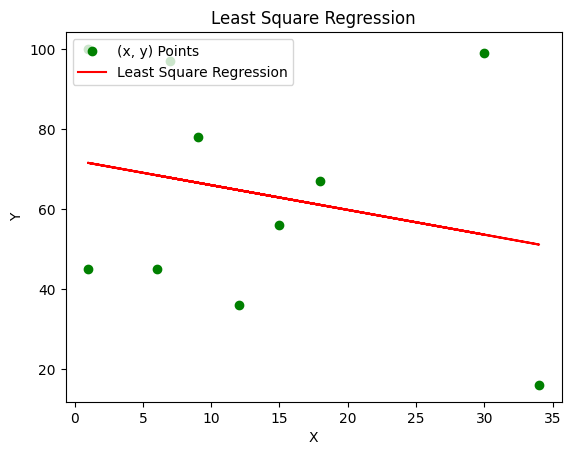

In [37]:
A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)

invers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(invers, A.T), Y)

m = beta[0]
c = beta[1]

yb = m * lx + c
plt.plot(lx, ly, "go", label = "(x, y) Points")
plt.plot(lx, yb, "r-", label = "Least Square Regression")
plt.legend(loc = "upper left")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Least Square Regression")
plt.show()

In [44]:
x = symbols('x')
f1 = lambda x : 9*x**4 + 2*x**2 - x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

print(df1(1))

f2 = lambda x : 7*x**7 - 5*x**4 + x - 3
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def NR(f, df, x, tol, max):
    if max == 6:
        return False
    
    if max > 0:
        print(f"Iteration {max}, root: {x}")
    
    if np.abs(f(x)) < tol:
        # print(x)
        return True
    
    return NR(f, df, x - (f(x) / df(x)), tol, max + 1)

print(NR(f1, df1, 1, 0.000762, 0))
print(NR(f2, df2, 1, 0.000762, 0))

39
Iteration 1, root: 0.7435897435897436
Iteration 2, root: 0.5579764439933204
Iteration 3, root: 0.4327953938413386
Iteration 4, root: 0.36221271605649774
Iteration 5, root: 0.33669918692652856
Iteration 6, root: 0.33338653155338616
True
True


In [45]:
f = lambda x : 7*x**4 - 3*x**2 + 5

uN = -7
uP = 5
n = 30

x = np.linspace(uN, uP, n)
width = (uP - uN) / (n - 1)

xLeft = x[:-1]
xRight = x[1:]
xMid = (xLeft + xRight) / 2

yL = f(xLeft)
yR = f(xRight)
yM = f(xMid)

leftRie = width * np.sum(np.abs(yL))
rightRie = width * np.sum(np.abs(yR))
midRie = width * np.sum(np.abs(yM))

trapezoid = width * np.sum(np.abs(yL) + (np.abs(yR))) / 2

print("Left Riemann: ", leftRie)
print("Right Riemann: ", rightRie)
print("Mid Riemann: ", midRie)
print("Trapezoid: ", trapezoid)

Left Riemann:  30239.909348618152
Right Riemann:  25125.42658999747
Mid Riemann:  27403.896799150552
Trapezoid:  27682.66796930782
